# The Qiskit Framework
<img src="qiskit-framework.png">

In [1]:
from qiskit import *
%matplotlib inline
import numpy as np

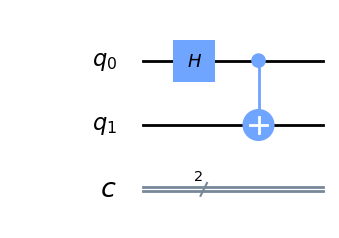

In [28]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)

qc.draw('mpl')

ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of ticklabels (4).

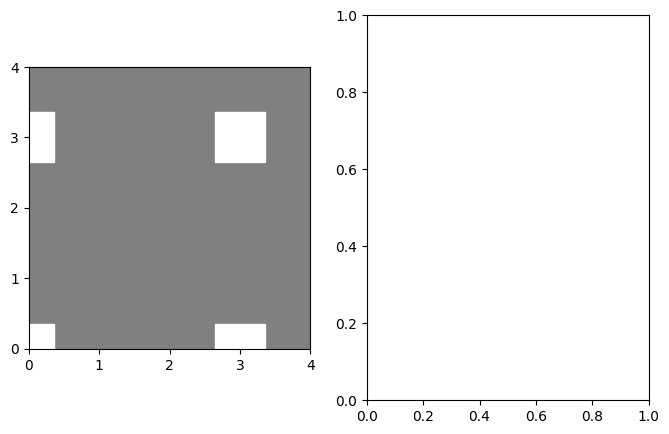

In [30]:
from qiskit.visualization import plot_state_hinton

sim = Aer.get_backend('statevector_simulator') # qasm_simulator, statevector_simulator, unitary_simulator
result = execute(qc, backend=sim).result()
state = result.get_statevector(qc)
plot_state_hinton(state)

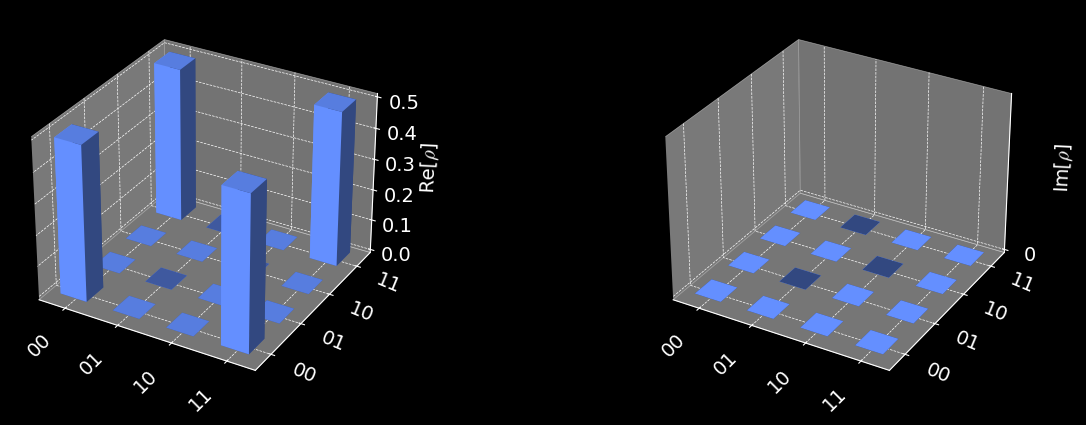

In [18]:
from qiskit.visualization import *
from matplotlib import style
style.use('bmh')
style.use('dark_background')

plot_state_city(state)

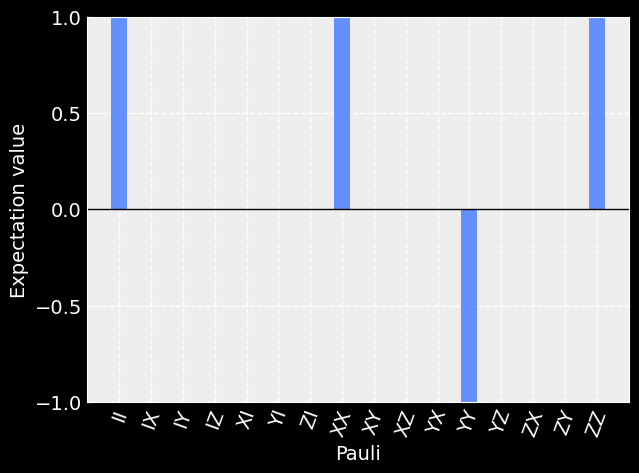

In [19]:
plot_state_paulivec(result.get_statevector(qc))

In [20]:
from qiskit import IBMQ

IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [23]:
from qiskit.tools.monitor import job_monitor

provider =  IBMQ.get_provider(hub='ibm-q', group='open')
backend = provider.get_backend('ibmq_santiago')
job = execute(qc, backend=backend, shots=8192)

job_monitor(job)

Job Status: job has successfully run


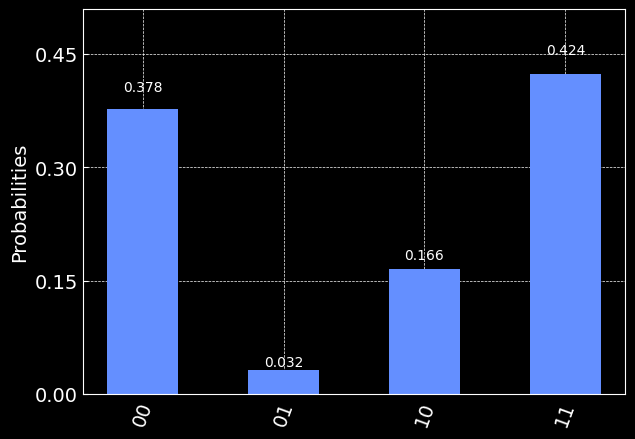

In [25]:
from qiskit.visualization import plot_histogram
result = job.result()
plot_histogram(result.get_counts(qc))